https://www.kaggle.com/datasets/tedogogoladze/open-university-analytics-datasets-unzipped?search=university&fileType=csv&sizeStart=700%2CKB&select=studentInfo.csv

In [336]:
# importamos las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn import tree

import pandas as pd
import numpy as np
import seaborn as sb

In [337]:
# Importar el dataset y lo convertimos en un DataFrame
df = pd.read_csv('studentInfo.csv')

In [338]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [339]:
#df['region'].unique()
#df['gender'].unique()
#df['highest_education'].unique()
#df['code_presentation'].unique()
#df['age_band'].unique()
#df['disability'].unique()
df['final_result'].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [340]:
df.drop(['id_student', 'region', 'studied_credits', 'imd_band', 'code_module', 'code_presentation'], axis=1, inplace=True)

In [341]:
#Convierto las columnas object a valores numericos
df['gender'] = df['gender'].map({'M': 0, 'F':1})
df['highest_education'] = df['highest_education'].map({'HE Qualification':0, 'A Level or Equivalent':1, 'Lower Than A Level':2, 'Post Graduate Qualification':3, 'No Formal quals':4})
df['age_band'] = df['age_band'].map({'55<=': 0, '35-55' : 1, '0-35' : 2})
df['disability'] = df['disability'].map({'N':0, 'Y':1})
df['final_result'] = df['final_result'].map({'Pass':0, 'Withdrawn':1, 'Fail':2, 'Distinction':3})

In [342]:
df.describe()

,gender,highest_education,age_band,num_of_prev_attempts,disability,final_result
count,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000
mean,0.451569,1.309729,1.697328,0.163225,0.097076,1.022674
std,0.497657,0.766255,0.473628,0.479758,0.296066,0.982984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000
75%,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000
max,1.000000,4.000000,2.000000,6.000000,1.000000,3.000000


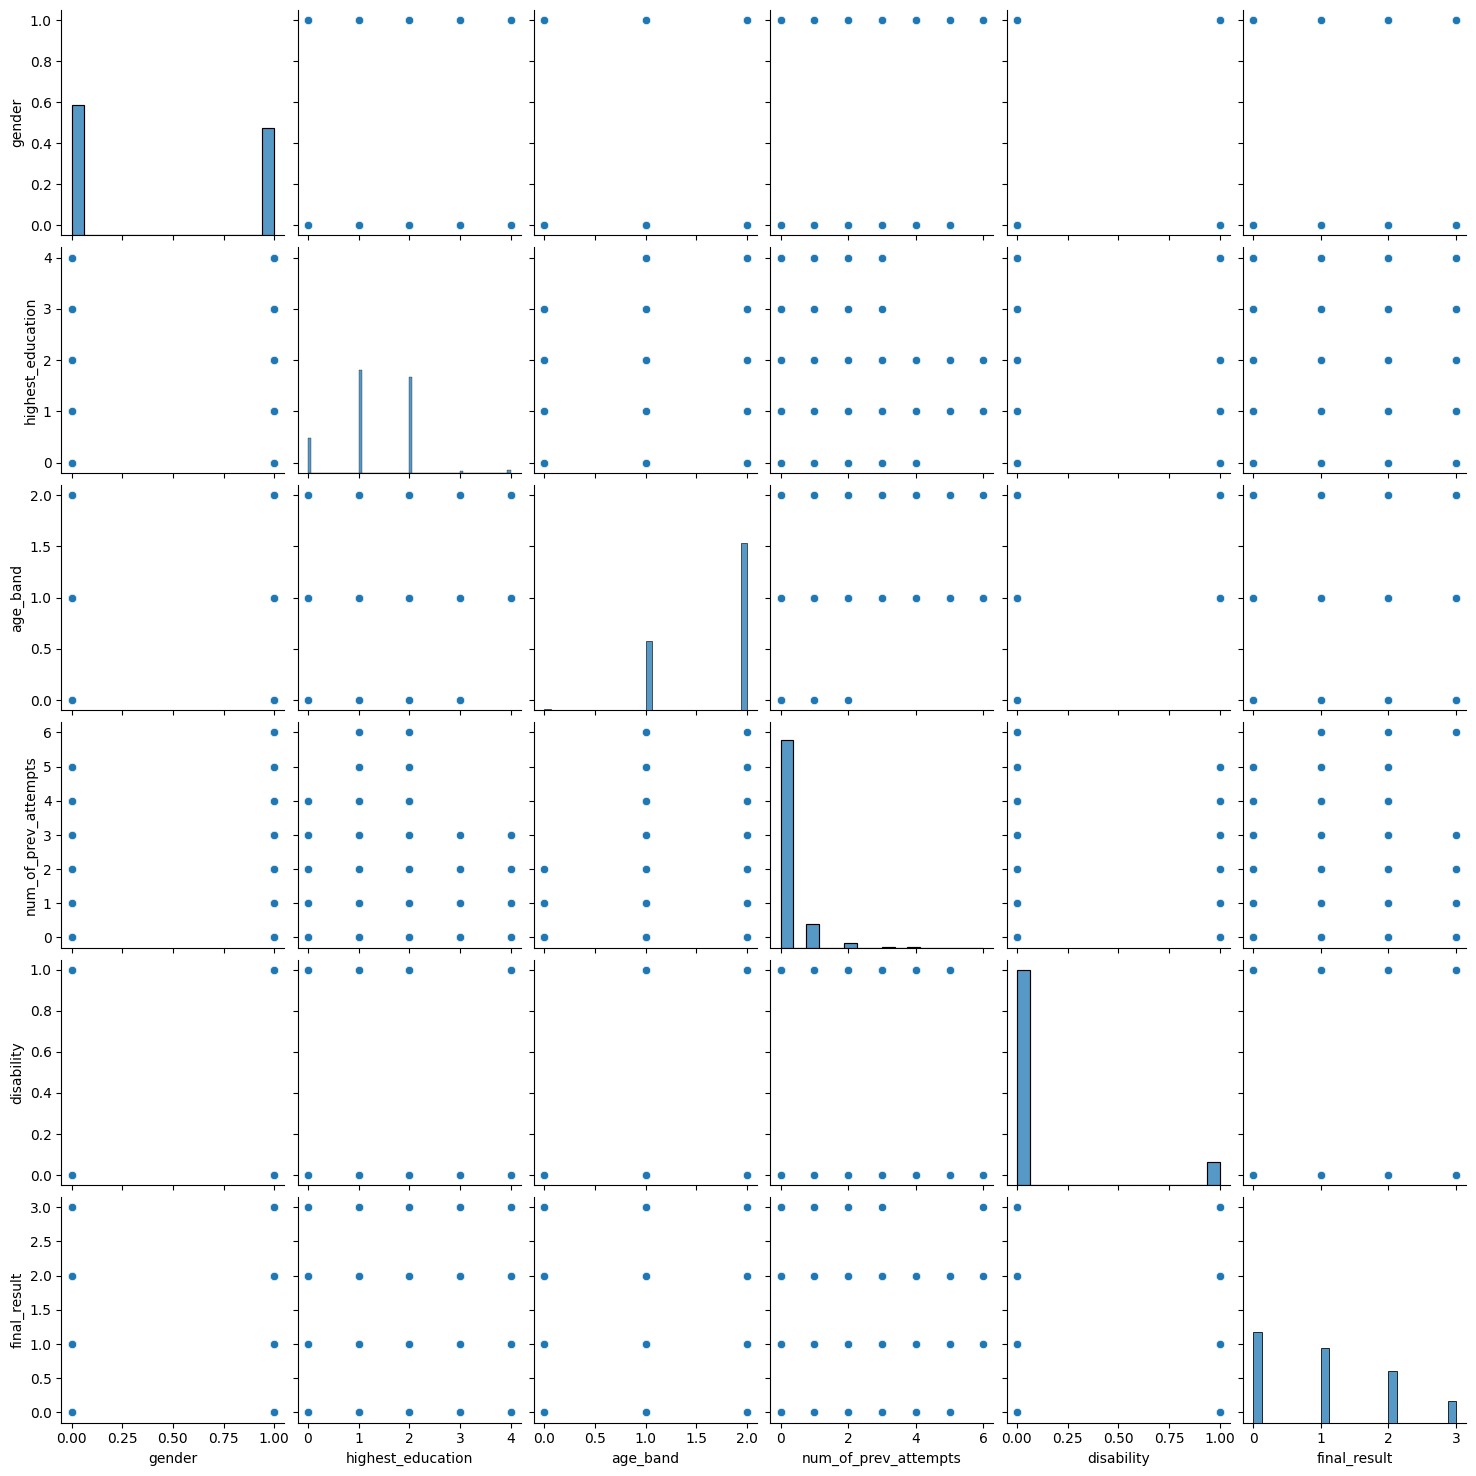

In [343]:
sb.pairplot(df)

In [344]:
data_x = df.drop(['num_of_prev_attempts'], axis=1)
data_y = df.num_of_prev_attempts

In [345]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [346]:
decission_tree = tree.DecisionTreeClassifier()

In [347]:
decission_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [348]:
# Medir la confianza de nuestro modelo
print(f'Score: {round(decission_tree.score(test_x, test_y) , 4) * 100.0}%')

Score: 86.9%


In [349]:
highest_education_labels={0:'HE Qualification', 1:'A Level or Equivalent', 2:'Lower Than A Level',3:'Post Graduate Qualification', 4:'No Formal quals'}
gender_labels={1: 'Femenino', 0: 'Masculino'}
age_band_labels={0:'55<=', 1:'35-55', 2:'0-35'}
disability_labels={0:'Sin', 1:'Con'}
final_result_labels={0:'Pass', 1:'Withdrawn', 2:'Fail', 3:'Distinction'}

gender=1
highest_education=1
age_band=1
disability=0
final_result=3


In [350]:
predicted = decission_tree.predict([[gender, highest_education, age_band, disability,final_result]])
print(f'Un estudiante de genero {gender_labels[gender]}, de educacion maxima {highest_education_labels[highest_education]}, rango de edad {age_band_labels[age_band]}, {disability_labels[disability]} discapacidad y un resultado final de {final_result_labels[final_result]} tuvo intentos anteriores = {predicted[0]}')

Un estudiante de genero Femenino, de educacion maxima A Level or Equivalent, rango de edad 35-55, Sin discapacidad y un resultado final de Distinction tuvo intentos anteriores = 0


d:\Practico 3 Algoritmica\practico3_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.4401683381088825, 0.9583333333333334, 'x[4] <= 0.5\ngini = 0.228\nsamples = 29333\nvalue = [25588, 2956, 614, 126, 33, 12, 4]'),
 Text(0.1530085959885387, 0.875, 'x[3] <= 0.5\ngini = 0.179\nsamples = 11142\nvalue = [10057, 892, 155, 26, 10, 2, 0]'),
 Text(0.06074498567335244, 0.7916666666666666, 'x[1] <= 0.5\ngini = 0.172\nsamples = 10237\nvalue = [9281, 785, 139, 23, 7, 2, 0]'),
 Text(0.02979942693409742, 0.7083333333333334, 'x[2] <= 1.5\ngini = 0.144\nsamples = 1723\nvalue = [1589, 122, 9, 3, 0, 0, 0]'),
 Text(0.01833810888252149, 0.625, 'x[2] <= 0.5\ngini = 0.131\nsamples = 745\nvalue = [693, 46, 6, 0, 0, 0, 0]'),
 Text(0.009169054441260744, 0.5416666666666666, 'x[0] <= 0.5\ngini = 0.083\nsamples = 46\nvalue = [44, 2, 0, 0, 0, 0, 0]'),
 Text(0.004584527220630372, 0.4583333333333333, 'gini = 0.095\nsamples = 40\nvalue = [38, 2, 0, 0, 0, 0, 0]'),
 Text(0.013753581661891117, 0.4583333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0, 0, 0, 0]'),
 Text(0.02750716332378223

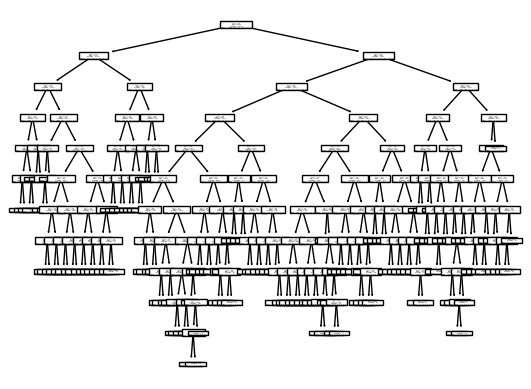

In [351]:
tree.plot_tree(decission_tree)